In [60]:
!pip install numpy
!pip install pandas
#importing the necessary packages

In [61]:
import numpy as np
import pandas as pd


In [62]:
location = r"C:\Users\LENOVO\Downloads\price_update.csv"
data = pd.read_csv(location, encoding ='latin-1') #single byte character encoding
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [63]:
data.shape


(2012, 12)

In [64]:
data.isnull().sum()

laptop_ID            0
Company              0
Product              0
TypeName             1
Inches              10
ScreenResolution     8
Cpu                  9
Ram                  2
Gpu                  7
OpSys                1
Weight               0
Price_euros          0
dtype: int64

In [66]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns (using the mean)
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Handle missing values for categorical columns (using the most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

In [67]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         2012 non-null   float64
 1   Company           2012 non-null   object 
 2   Product           2012 non-null   object 
 3   TypeName          2012 non-null   object 
 4   Inches            2012 non-null   float64
 5   ScreenResolution  2012 non-null   object 
 6   Cpu               2012 non-null   object 
 7   Ram               2012 non-null   object 
 8   Gpu               2012 non-null   object 
 9   OpSys             2012 non-null   object 
 10  Weight            2012 non-null   object 
 11  Price_euros       2012 non-null   float64
dtypes: float64(3), object(9)
memory usage: 188.8+ KB


In [69]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')

In [70]:
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')

In [120]:
data.corr()['Price_euros']

Ram                            0.757274
Weight                         0.147956
Price_euros                    1.000000
Touchscreen                    0.247823
Ips                            0.330116
Company_Acer                  -0.136523
Company_Apple                  0.098481
Company_Asus                  -0.272436
Company_Dell                   0.139430
Company_HP                     0.055535
Company_Lenovo                 0.070984
Company_MSI                    0.204377
Company_Other                  0.109491
Company_Toshiba                0.073462
TypeName_2 in 1 Convertible    0.126565
TypeName_Gaming                0.417355
TypeName_Netbook              -0.064176
TypeName_Notebook             -0.599184
TypeName_Ultrabook             0.306380
TypeName_Workstation           0.258854
OpSys_Linux                   -0.107657
OpSys_Mac                      0.098481
OpSys_Other                   -0.371925
OpSys_Windows                  0.384224
cpu_name_AMD                  -0.126752


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         2012 non-null   float64
 1   Company           2012 non-null   object 
 2   Product           2012 non-null   object 
 3   TypeName          2012 non-null   object 
 4   Inches            2012 non-null   float64
 5   ScreenResolution  2012 non-null   object 
 6   Cpu               2012 non-null   object 
 7   Ram               2012 non-null   int32  
 8   Gpu               2012 non-null   object 
 9   OpSys             2012 non-null   object 
 10  Weight            2012 non-null   float32
 11  Price_euros       2012 non-null   float64
dtypes: float32(1), float64(3), int32(1), object(7)
memory usage: 173.0+ KB


In [72]:
import pandas as pd

# Function to calculate and remove outliers using IQR
def handle_outliers(df):
    # Only numeric columns (float64 or int64)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Count outliers before handling
    before_outliers = {col: df[col].apply(lambda x: x < (df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) 
                                            or x > (df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))).sum() for col in numeric_cols}
    
    # Calculate IQR and filter out outliers
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Apply filter to remove outliers
    df_no_outliers = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    # Count outliers after handling
    after_outliers = {col: df_no_outliers[col].apply(lambda x: x < (df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) 
                                                     or x > (df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))).sum() for col in numeric_cols}
    
    # Output results
    print("Outliers before handling:")
    print(before_outliers)
    print("\nOutliers after handling:")
    print(after_outliers)
    
    return df_no_outliers

# Apply the function
data_no_outliers = handle_outliers(data)


Outliers before handling:
{'laptop_ID': np.int64(0), 'Inches': np.int64(194), 'Price_euros': np.int64(123)}

Outliers after handling:
{'laptop_ID': np.int64(0), 'Inches': np.int64(0), 'Price_euros': np.int64(0)}


In [73]:
data['Company'].value_counts()

Company
Asus         867
Dell         297
Lenovo       297
HP           274
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [74]:
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt

In [75]:
data['Company'] = data['Company'].apply(add_company)

In [76]:

data['Company'].value_counts()

Company
Asus       867
Lenovo     297
Dell       297
HP         274
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

In [77]:
# we cannot use onehot encoding for this as it creates 618 columns 
len(data['Product'].value_counts())

618

In [78]:
# we can use onehot encoding as this will have six columns
data['TypeName'].value_counts()

TypeName
Notebook              1437
Gaming                 204
Ultrabook              196
2 in 1 Convertible     121
Workstation             29
Netbook                 25
Name: count, dtype: int64

In [79]:
# considering the data column ScreenResolution
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                            513
1366x768                                     278
IPS Panel Full HD 1920x1080                  230
IPS Panel Full HD / Touchscreen 1920x1080     52
Full HD / Touchscreen 1920x1080               47
                                            ... 
1366x1473                                      1
1366x1474                                      1
1366x1475                                      1
1366x1476                                      1
1366x1477                                      1
Name: count, Length: 748, dtype: int64

In [80]:
# check whether it has the IPS technnology and touch screen
# see the screen resolution column and then apply the lamda function 
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [81]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,1.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2.0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0


In [82]:
data['Cpu'].value_counts()

Cpu
Intel Celeron Dual Core N3050 1.6GHz    729
Intel Core i5 7200U 2.5GHz              189
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
                                       ... 
Intel Core i5 7200U 2.70GHz               1
Intel Core M M7-6Y75 1.2GHz               1
Intel Core M 6Y54 1.1GHz                  1
AMD E-Series 9000 2.2GHz                  1
Samsung Cortex A72&A53 2.0GHz             1
Name: count, Length: 116, dtype: int64

In [83]:
data['cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [84]:
data['cpu_name'].value_counts()


cpu_name
Intel Celeron Dual          798
Intel Core i7               526
Intel Core i5               419
Intel Core i3               134
Intel Pentium Quad           27
Intel Core M                 18
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD E-Series E2-9000e         2
AMD A9-Series A9-9420         2
AMD Ryzen 1700                2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD FX 9830P                  1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD E-Series 6110             1

In [85]:
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

In [86]:

data['cpu_name'] = data['cpu_name'].apply(set_processor)

In [87]:
data['cpu_name'].value_counts()


cpu_name
Other            872
Intel Core i7    526
Intel Core i5    419
Intel Core i3    134
AMD               61
Name: count, dtype: int64

In [88]:
data['Ram'].value_counts()

Ram
4     1085
8      618
16     200
6       41
12      25
2       22
32      17
24       3
64       1
Name: count, dtype: int64

In [89]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics          745
Intel HD Graphics 620      280
Intel HD Graphics 520      185
Intel UHD Graphics 620      67
Nvidia GeForce GTX 1050     66
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 109, dtype: int64

In [90]:
data['gpu_name'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))


In [91]:
data['gpu_name'].value_counts()

gpu_name
Intel     1434
Nvidia     398
AMD        179
ARM          1
Name: count, dtype: int64

In [92]:
data.shape

(2012, 16)

In [93]:
data = data[data['gpu_name'] != 'ARM']
# this is done because the ARM is having only 1 data available. Since it will not give any specific information


In [94]:

data.shape

(2011, 16)

In [95]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,cpu_name,gpu_name
0,1.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,2.0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel


In [96]:
data['OpSys'].value_counts()

OpSys
Windows 10     1072
No OS            66
Linux            62
Windows 7        45
Chrome OS        26
               ... 
Windows 715       1
Windows 716       1
Windows 717       1
Windows 718       1
Windows 630       1
Name: count, Length: 718, dtype: int64

In [97]:

def set_os(inpt):
    if inpt == 'Windows 10' or inpt == 'Windows 7' or inpt == 'Windows 10 S':
        return 'Windows'
    elif inpt == 'macOS' or inpt == 'Mac OS X':
        return 'Mac'
    elif inpt == 'Linux':
        return inpt
    else:
        return 'Other'

In [98]:

data['OpSys'] = data['OpSys'].apply(set_os)

In [99]:

data['OpSys'].value_counts()

OpSys
Windows    1125
Other       803
Linux        62
Mac          21
Name: count, dtype: int64

In [100]:

data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,cpu_name,gpu_name
0,1.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,2.0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,Intel Core i5,Intel


In [101]:
data = data.drop(columns=['laptop_ID', 'Inches', 'Product', 'ScreenResolution', 'Cpu', 'Gpu'])
data.head()


,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,cpu_name,gpu_name
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,Notebook,8,Other,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,Intel Core i5,Intel


In [102]:
# one-hot encoding
data = pd.get_dummies(data)

In [103]:

data.head(2)

,Ram,Weight,Price_euros,Touchscreen,Ips,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,1339.69,0,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,8,1.34,898.94,0,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [104]:

data.shape

(2011, 32)

In [105]:

X = data.drop('Price_euros', axis=1)
y = data['Price_euros']

In [106]:

!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [108]:

X_train.shape, X_test.shape

((1508, 31), (503, 31))

In [109]:

def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [110]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.6827821041532265
Lasso() --> 0.6779397178028667
DecisionTreeRegressor() --> 0.7550896468782767
RandomForestRegressor() --> 0.7582111809092662


In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize a dictionary to store the results
best_params = {}
best_scores = {}
test_accuracies = {}

# 1. Linear Regression (Baseline Model)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
baseline_score = r2_score(y_test, y_pred_lr)
best_scores['Linear Regression'] = baseline_score
test_accuracies['Linear Regression'] = baseline_score
print(f"Linear Regression Baseline Score (Test Accuracy): {baseline_score:.4f}")

# 2. Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_search = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(X_train, y_train)
best_params['Lasso'] = lasso_search.best_params_
best_scores['Lasso'] = -lasso_search.best_score_

# Test set accuracy for Lasso
best_lasso = lasso_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
lasso_accuracy = r2_score(y_test, y_pred_lasso)
test_accuracies['Lasso'] = lasso_accuracy
print(f"Lasso Best Parameters: {lasso_search.best_params_}")
print(f"Lasso Best Score (Cross-Validated): {-lasso_search.best_score_:.4f}")
print(f"Lasso Test Accuracy: {lasso_accuracy:.4f}")

# 3. Decision Tree Regressor
dt_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt = DecisionTreeRegressor()
dt_search = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_search.fit(X_train, y_train)
best_params['Decision Tree'] = dt_search.best_params_
best_scores['Decision Tree'] = -dt_search.best_score_

# Test set accuracy for Decision Tree
best_dt = dt_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)
dt_accuracy = r2_score(y_test, y_pred_dt)
test_accuracies['Decision Tree'] = dt_accuracy
print(f"Decision Tree Best Parameters: {dt_search.best_params_}")
print(f"Decision Tree Best Score (Cross-Validated): {-dt_search.best_score_:.4f}")
print(f"Decision Tree Test Accuracy: {dt_accuracy:.4f}")

# 4. Random Forest Regressor
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_search.fit(X_train, y_train)
best_params['Random Forest'] = rf_search.best_params_
best_scores['Random Forest'] = -rf_search.best_score_

# Test set accuracy for Random Forest
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = r2_score(y_test, y_pred_rf)
test_accuracies['Random Forest'] = rf_accuracy
print(f"Random Forest Best Parameters: {rf_search.best_params_}")
print(f"Random Forest Best Score (Cross-Validated): {-rf_search.best_score_:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Summary of Results
print("\nSummary of Best Parameters, Cross-Validated Scores, and Test Accuracies:")
for model, params in best_params.items():
    print(f"{model}:")
    print(f"  Best Parameters: {params}")
    print(f"  Cross-Validated Score: {-best_scores[model]:.4f}")
    print(f"  Test Accuracy: {test_accuracies[model]:.4f}")



Linear Regression Baseline Score (Test Accuracy): 0.6828
Lasso Best Parameters: {'alpha': 1}
Lasso Best Score (Cross-Validated): 110301.1751
Lasso Test Accuracy: 0.6779
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Best Score (Cross-Validated): 101731.4315
Decision Tree Test Accuracy: 0.6636
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Score (Cross-Validated): 77612.7761
Random Forest Test Accuracy: 0.7461

Summary of Best Parameters, Cross-Validated Scores, and Test Accuracies:
Lasso:
  Best Parameters: {'alpha': 1}
  Cross-Validated Score: -110301.1751
  Test Accuracy: 0.6779
Decision Tree:
  Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
  Cross-Validated Score: -101731.4315
  Test Accuracy: 0.6636
Random Forest:
  Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split':

Model: LinearRegression
Mean Absolute Error (MAE): 252.03
Mean Squared Error (MSE): 130802.00
Root Mean Squared Error (RMSE): 361.67
R² Score: 0.68
----------------------------------------


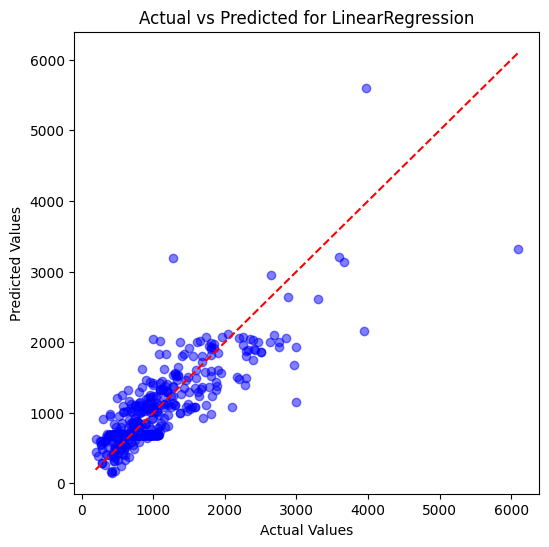

Model: Lasso
Mean Absolute Error (MAE): 252.30
Mean Squared Error (MSE): 132798.71
Root Mean Squared Error (RMSE): 364.42
R² Score: 0.68
----------------------------------------


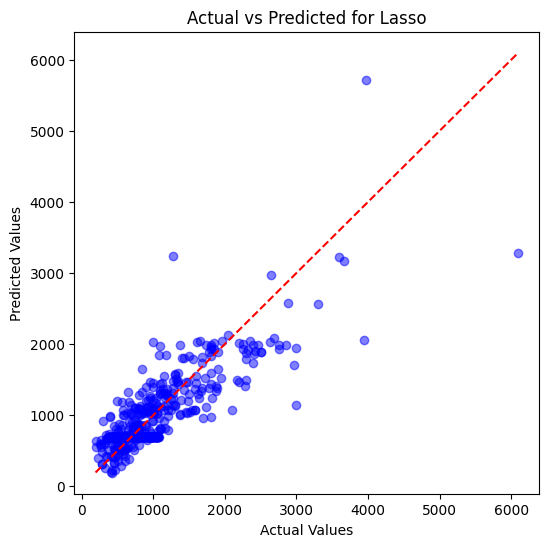

Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 220.92
Mean Squared Error (MSE): 103264.77
Root Mean Squared Error (RMSE): 321.35
R² Score: 0.75
----------------------------------------


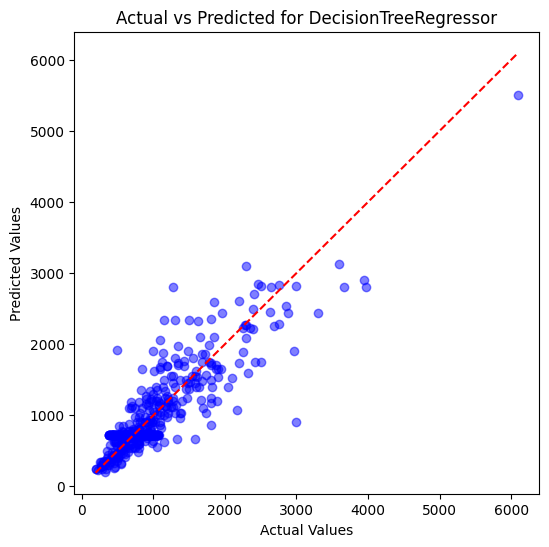

Model: RandomForestRegressor
Mean Absolute Error (MAE): 211.04
Mean Squared Error (MSE): 99667.48
Root Mean Squared Error (RMSE): 315.70
R² Score: 0.76
----------------------------------------


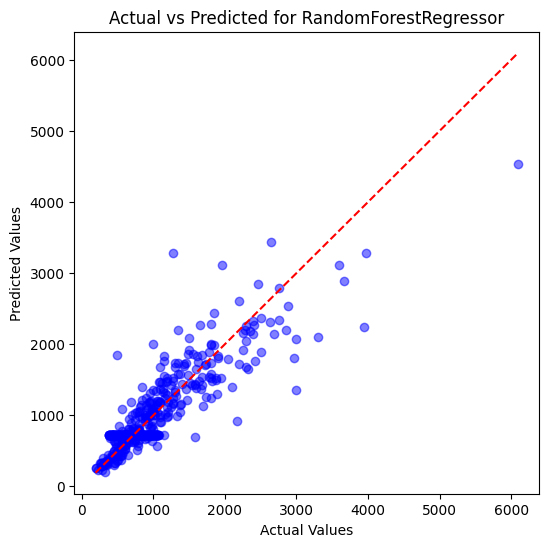

In [111]:
# Required imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the regression evaluation function
def regression_evaluation(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict the target values for the test set
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"Model: {type(model).__name__}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 40)
    
    # Plot Actual vs Predicted values
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted for {type(model).__name__}")
    plt.show()

# Models to evaluate
models = [
    LinearRegression(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Ensure X_train, X_test, y_train, y_test are defined
# Example placeholder for the training and testing data
# Replace these with actual split data
# Example:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model in models:
    regression_evaluation(model, X_train, X_test, y_train, y_test)


In [112]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.758865322895485

In [113]:

X_test.columns

Index(['Ram', 'Weight', 'Touchscreen', 'Ips', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'cpu_name_AMD', 'cpu_name_Intel Core i3', 'cpu_name_Intel Core i5',
       'cpu_name_Intel Core i7', 'cpu_name_Other', 'gpu_name_AMD',
       'gpu_name_Intel', 'gpu_name_Nvidia'],
      dtype='object')

In [114]:
from sklearn.svm import SVR

# Initialize the model
svm = SVR(kernel='rbf')

# Model evaluation function
model_acc(svm)


SVR() --> 0.13702994868255947


In [115]:

import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [116]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN model
knn = KNeighborsRegressor(n_neighbors=5)

# Model evaluation function
model_acc(knn)


KNeighborsRegressor() --> 0.7166208258738468


In [117]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor()

# Model evaluation function
model_acc(gb)


GradientBoostingRegressor() --> 0.7499590061639128


In [118]:
from sklearn.ensemble import VotingRegressor

# Combine models into a voting regressor
voting_regressor = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('gb', gb)])

# Model evaluation function
model_acc(voting_regressor)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor())]) --> 0.7609749574285446


In [125]:
import numpy as np
import itertools
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

# Assuming X and y are preprocessed and available
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Hyperparameter Tuning for Individual Models

# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Random Forest Grid Search
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best = rf_grid_search.best_estimator_
print("Best Random Forest Params:", rf_grid_search.best_params_)

# Gradient Boosting Grid Search
gb = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5, scoring='r2', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_best = gb_grid_search.best_estimator_
print("Best Gradient Boosting Params:", gb_grid_search.best_params_)

# Linear Regression (No tuning needed)
lr = LinearRegression()

# Step 2: Create the Voting Regressor with Tuned Models
voting_regressor = VotingRegressor(estimators=[
    ('lr', lr),
    ('rf', rf_best),
    ('gb', gb_best)
])

# Step 3: Optimize Weights for Voting Regressor
weights_list = list(itertools.product(range(1, 4), repeat=3))  # Weights ranging from 1 to 3
best_score = -np.inf
best_weights = None

for weights in weights_list:
    voting_regressor.set_params(weights=weights)
    voting_regressor.fit(X_train, y_train)
    score = r2_score(y_test, voting_regressor.predict(X_test))
    if score > best_score:
        best_score = score
        best_weights = weights

print("Best Weights:", best_weights)
print("Best R2 Score with Optimized Weights:", best_score)

# Step 4: Evaluate Final Model
voting_regressor.set_params(weights=best_weights)
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
print("Final Voting Regressor R2 Score on Test Data:", final_r2)


Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Weights: (1, 2, 3)
Best R2 Score with Optimized Weights: 0.7896478470194515
Final Voting Regressor R2 Score on Test Data: 0.7896478470194515


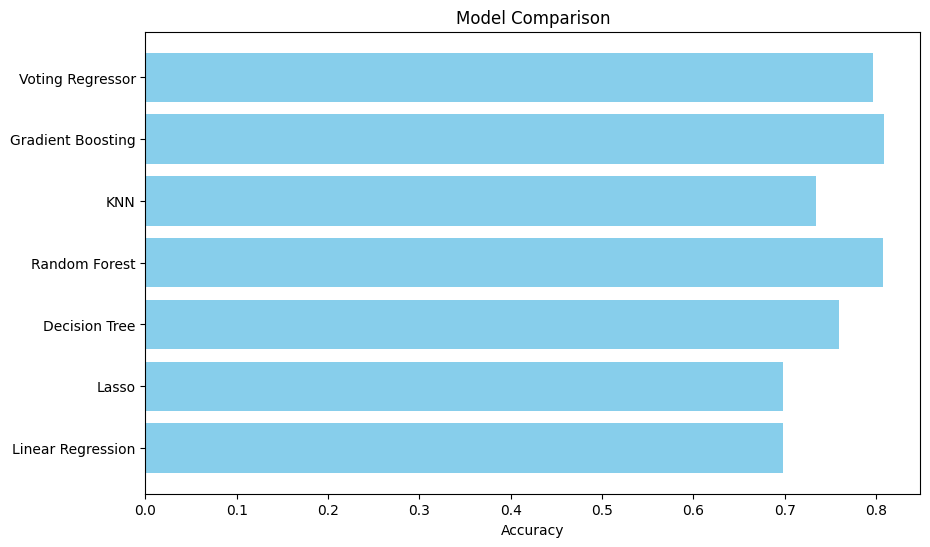

In [123]:
import matplotlib.pyplot as plt

# Store accuracies of different models
models = ['Linear Regression', 'Lasso', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting', 'Voting Regressor']
accuracies = [0.6980307313905778, 0.6978883331336304, 0.759136115554515, 0.8077078437843672 , 0.7338256351279361, 0.8081678803516794,0.7966018862446924]  # Replace with actual accuracy values





# Plot
plt.figure(figsize=(10,6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()
